In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import skimage.io
from skimage.io import imread

from pandas.compat import StringIO
import re

import sys
from collections import Counter

from mpl_toolkits.basemap import Basemap

# Of what customers' ratings of restaurants are affected?
## Author: Martin Topalov

### Abstract
In these research we will find out some dependency between the ratings of the people of a restaurant and other properties like price, type of cuisine, city and ect. We will also plot our results with various gaphical visualizations.

### Previous research
During the last few years, reviews have become crucial to the success of a restaurant, as every restaurant owner is aware of the fact that good reviews can boost popularity and profitability, whereas terrible reviews even have the potential of closing businesses down. That's why it is crucial for restauranteurs to understand the impact of review websites such as Yelp, Toptable or TripAdvisors and the role they play the success or downfall of a business.
In a recent research report published by the experts at  Website Builder, approximately 61% of customers have read online reviews about restaurants. While such a significant number people tend to read online reviews prior to visiting a particular restaurant to dine or hosting an event, it is also worth pointing out that around 34% of diners currently choose restaurants based solely on information offered on peer review websites. This means that most diners disregard the restaurant’s website or social media pages, preferring  to rely  on data present on review sites,  further increasing their importance and influence on the market. Another interesting fact is that approximately 53% of the coveted 18 to 34-year-old demographic reported that online reviews play an important role into their dining decisions.

An independent survey of 12 000 travellers, conducted by PhoCusWright, revealed that 75% of people now use TripAdvisor before booking a hotel, and just over half use the site before choosing a restaurant.
Around 53% said they would not book a hotel that had no reviews, while 31% said they would avoid eating at a restaurant that had no reviews.
Quantity of reviews is also important, the study found, with majority of people reading at least 6-12 reviews before making a booking. This average was lower for restaurants, although 20% of respondents said they read over 11 reviews before making a decision.
Although bad reviews can put people off booking, the study confirmed that hotels and restaurants can lessen the impact of bad reviews by responding quickly and appropriately. Around 62% of users agreed that seeing hotel managment responses to reviews made them more likely to book, while 87% of users agreed that an appropriate managment response to a bad review would improve their impression of the hotel.
73% of people said they were likely to look at traveller submitted photos, while 65% said they were more likely to book properties that had won Tripadvisor awards.

According to a study by Woo Gong Kim and Jun Li: 
* The  number  of  online  reviews  is  positively  associated  with restaurant  performance.
* Restaurant  rankings  are  positively  associated  with  restaurant performance.
* Restaurant  operating  efficiency  is  positively  associated  with restaurant  performance.
* Excellence  certificate  moderates  the  effect  of  determinants (number  of  online  reviews,  restaurant  rankings,  and  operational efficiency)  on  restaurant  performance.

### First dataset - Best restaurants of the major cities in the world.

We start our research by loading and reading the data set, containing information about best restaurants of the major cities in the world.

In [3]:
data_restaurants = pd.read_csv("zomato-restaurants-data/zomato.csv", encoding = "latin1", low_memory=False)
data_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Print number of observations and columns.

In [4]:
print(data_restaurants.shape)

(9551, 21)


We check the number of the unique elements in the "Restaurant ID" column to decide whether to make it an index on our table.

In [5]:
len(data_restaurants["Restaurant ID"].unique())

9551

We see that the two lengths are equal which means that we can make "Restaurant ID" column as index, but since we don't need that information we will leave the simplest index for our convenience.

We visualize the location of all restaurants.

In [6]:
restaurants_with_locations = data_restaurants[data_restaurants["Latitude"].notnull() & data_restaurants["Longitude"].notnull()]

In [7]:
restaurants_with_locations = restaurants_with_locations[(restaurants_with_locations["Latitude"] != 0) | (restaurants_with_locations["Longitude"] != 0)]

C:\Users\Martin28\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\Users\Martin28\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


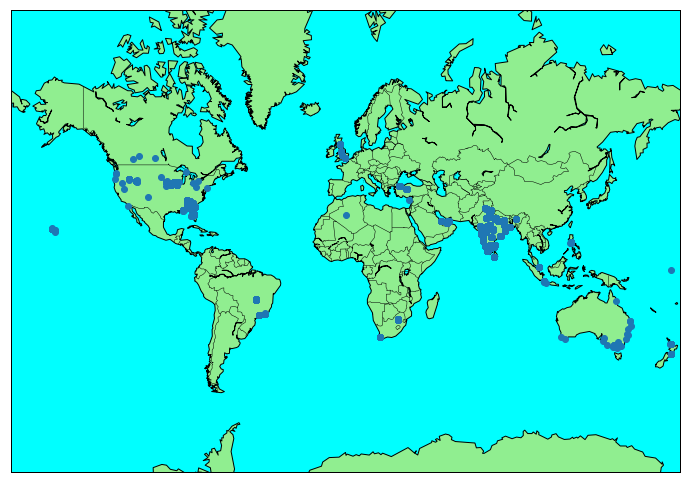

In [8]:
plt.figure(figsize = (12, 10))
m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)
x, y = m(restaurants_with_locations.Longitude.tolist(), restaurants_with_locations.Latitude.tolist())
m.plot(x, y, "o")
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "lightgreen", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
plt.show()

We visualize where are the most of restaurants.

In [9]:
def plot_restaurants(data_restaurants_arg, title = "Restaurant densities"):
    plt.figure(figsize = (15, 10))
    m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)

    # Prepare histogram bins
    num_bins = 100
    lon_bins = np.linspace(-180, 180, num_bins + 1)
    lat_bins = np.linspace(-90, 90, num_bins + 1)

    # Create 2D histogram values
    density, x_breaks, y_breaks = np.histogram2d(
        data_restaurants_arg.Latitude,
        data_restaurants_arg.Longitude, 
        [lat_bins, lon_bins])

    # Create the basis of the histogram - the (x, y) value pairs
    # and map them to 2D distances
    lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
    x, y = m(lon_bins_2d, lat_bins_2d)

    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh(x, y, density)
    m.colorbar()
    plt.title(title)
    plt.show()

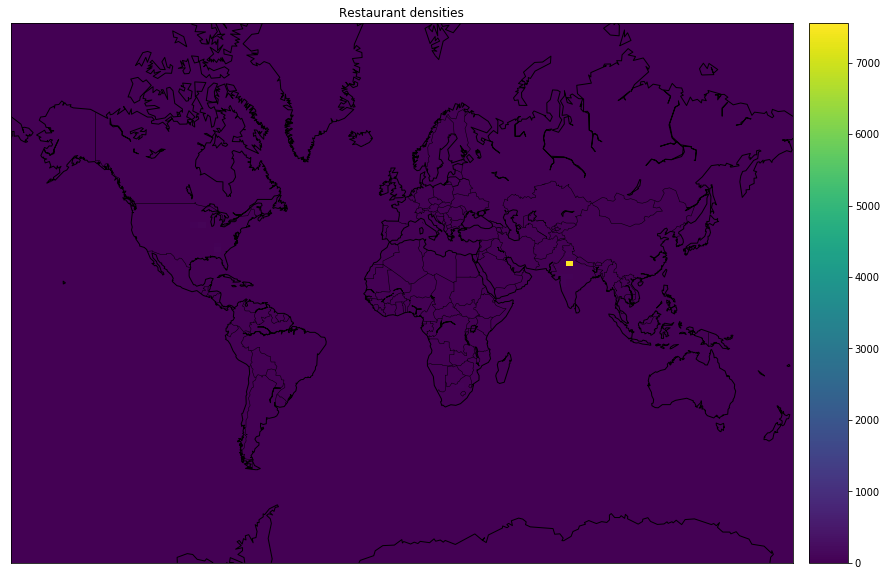

In [10]:
plot_restaurants(restaurants_with_locations)

We check whether there are any restaurant without a name in the table.

In [11]:
data_restaurants["Restaurant Name"].isna().any()

False

In [12]:
data_restaurants.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


We make a histogram of restaurant reatings.

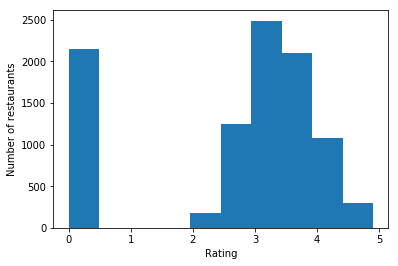

In [13]:
plt.hist(data_restaurants["Aggregate rating"])
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.show()

In [14]:
data_restaurants["Aggregate rating"].skew()

-0.9541304733200109

We check what is the color of restaurants with rating equal to 0.

In [15]:
data_restaurants[data_restaurants["Aggregate rating"] == 0]["Rating color"]

30      White
58      White
69      White
77      White
78      White
238     White
239     White
412     White
871     White
872     White
873     White
874     White
878     White
879     White
880     White
887     White
888     White
889     White
897     White
899     White
900     White
901     White
902     White
903     White
904     White
905     White
906     White
907     White
908     White
912     White
        ...  
9008    White
9009    White
9010    White
9014    White
9027    White
9028    White
9029    White
9030    White
9031    White
9032    White
9035    White
9044    White
9045    White
9046    White
9047    White
9048    White
9049    White
9066    White
9067    White
9098    White
9099    White
9100    White
9101    White
9102    White
9103    White
9109    White
9110    White
9111    White
9112    White
9351    White
Name: Rating color, Length: 2148, dtype: object

In [16]:
data_restaurants["Rating color"].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

Since in the description of the dataset is written that the restaurant's rating is between 1 and 5 and we notice that the colors in "Rating color" column are 6, we will remove those without a rating (with rating 0).

In [17]:
restaurants_with_rating = data_restaurants[data_restaurants["Aggregate rating"] != 0]

We make new histogram, this time of the restaurants with rating.

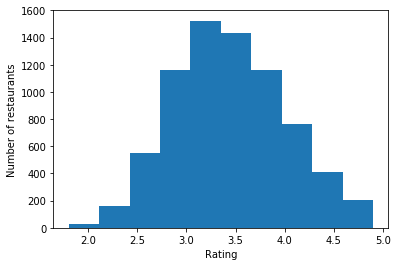

In [18]:
plt.hist(restaurants_with_rating["Aggregate rating"])
plt.xlabel("Rating")
plt.ylabel("Number of restaurants")
plt.show()

In [19]:
restaurants_with_rating["Aggregate rating"].skew()

0.23101500214375092

We notice a significant improvment.

In [20]:
restaurants_with_rating["Aggregate rating"].describe()

count    7403.000000
mean        3.440024
std         0.552195
min         1.800000
25%         3.000000
50%         3.400000
75%         3.800000
max         4.900000
Name: Aggregate rating, dtype: float64

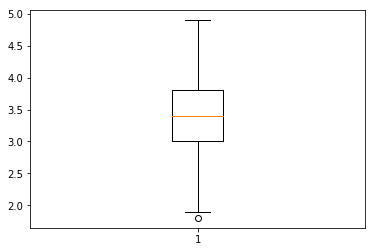

In [21]:
plt.boxplot(restaurants_with_rating["Aggregate rating"])
plt.show()

We will check if there is a correlation and how strong is it between the individual columns.

In [22]:
restaurants_with_rating.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.255215,-0.280596,-0.017232,0.011218,-0.006848,0.193038,-0.082984
Country Code,0.255215,1.000000,-0.736241,0.010346,0.039305,0.210459,0.412917,0.127652
Longitude,-0.280596,-0.736241,1.000000,-0.097542,0.049345,-0.074384,-0.291458,-0.085230
Latitude,-0.017232,0.010346,-0.097542,1.000000,-0.124947,-0.221437,-0.179917,-0.038285
Average Cost for two,0.011218,0.039305,0.049345,-0.124947,1.000000,0.070638,0.076790,0.063424
Price range,-0.006848,0.210459,-0.074384,-0.221437,0.070638,1.000000,0.403169,0.274103
Aggregate rating,0.193038,0.412917,-0.291458,-0.179917,0.076790,0.403169,1.000000,0.409018
Votes,-0.082984,0.127652,-0.085230,-0.038285,0.063424,0.274103,0.409018,1.000000


We see that there is a stronger correlation between "Aggregate rating" and "Country Code", "Aggregate rating" and "Price range", "Aggregate rating" and "Votes". We notice and a very strong correlation between "Country Code" and "Longitude", which is understandable. We will examine the first two dependencies.

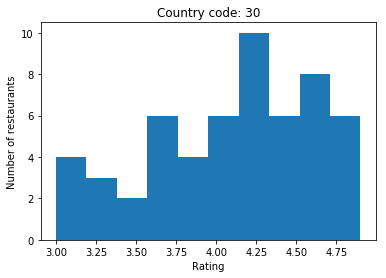

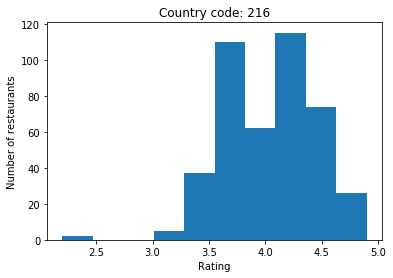

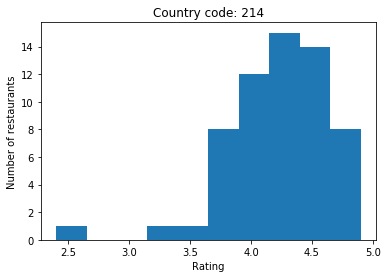

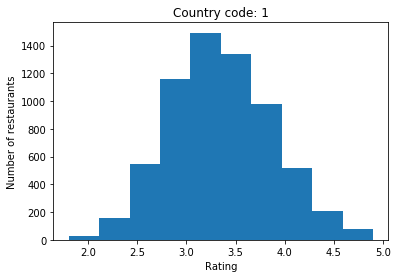

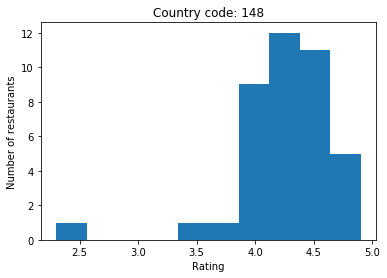

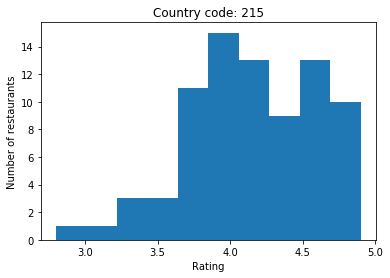

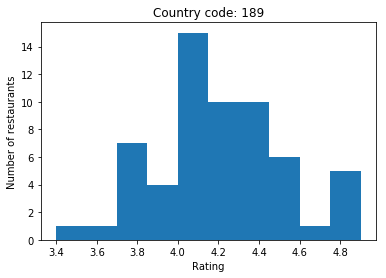

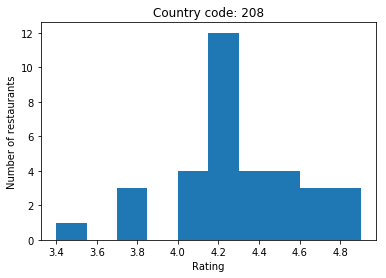

In [23]:
for country_code, data in restaurants_with_rating.groupby('Country Code', sort = False):
    if data["Country Code"].count() > 30:
        plt.hist(data["Aggregate rating"])
        plt.title("Country code: %d" %country_code)
        plt.xlabel("Rating")
        plt.ylabel("Number of restaurants")
        plt.show()

We will plot histograms of each price range and the ratings.

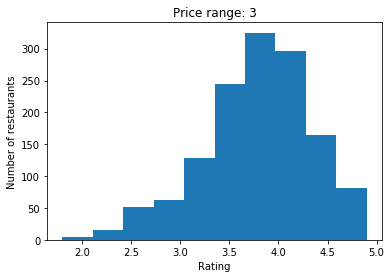

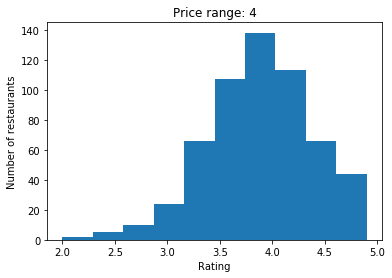

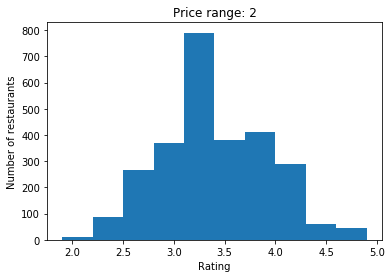

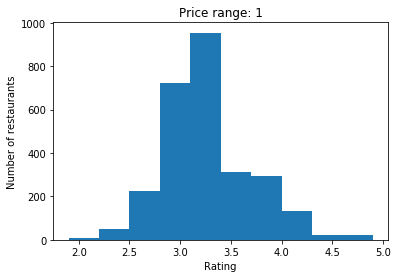

In [24]:
for price_range, data in restaurants_with_rating.groupby('Price range', sort = False):
    plt.hist(data["Aggregate rating"])
    plt.title("Price range: %d" %price_range)
    plt.xlabel("Rating")
    plt.ylabel("Number of restaurants")
    plt.show()

We will take a look at "Average Cost for two" column.

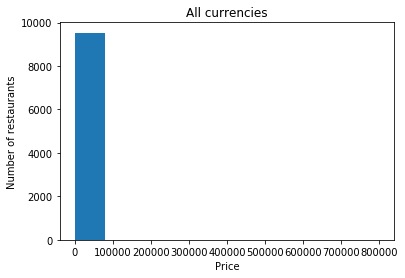

In [25]:
plt.hist(data_restaurants["Average Cost for two"])
plt.title("All currencies")
plt.xlabel("Price")
plt.ylabel("Number of restaurants")
plt.show()

In [26]:
data_restaurants["Average Cost for two"].skew()

35.477914900871276

As we can see, there is a huge difference between the prices, but this is because we have visualized different currencies at the same histogram. For that reason we will sort the data by currency and we will represent them separately.

In [27]:
list(restaurants_with_rating["Currency"].unique())

['Botswana Pula(P)',
 'Brazilian Real(R$)',
 'Dollar($)',
 'Emirati Diram(AED)',
 'Indian Rupees(Rs.)',
 'Indonesian Rupiah(IDR)',
 'NewZealand($)',
 'Pounds(\x8c£)',
 'Qatari Rial(QR)',
 'Rand(R)',
 'Sri Lankan Rupee(LKR)',
 'Turkish Lira(TL)']

In [28]:
grouped_restaurants = restaurants_with_rating.groupby('Currency', sort = False).count()
sorted_restaurants_by_currency = grouped_restaurants.sort_values(by = 'Aggregate rating', ascending = False)
sorted_restaurants_by_currency

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Currency,,,,,,,,,,,,,,,,,,,,
Indian Rupees(Rs.),6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513
Dollar($),479,479,479,479,479,479,479,479,479,470,479,479,479,479,479,479,479,479,479,479
Pounds(£),79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
Emirati Diram(AED),60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Rand(R),60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Brazilian Real(R$),55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
NewZealand($),40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Turkish Lira(TL),34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Botswana Pula(P),22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [29]:
restaurants_with_cost_for_two = restaurants_with_rating[restaurants_with_rating["Average Cost for two"] != 0]

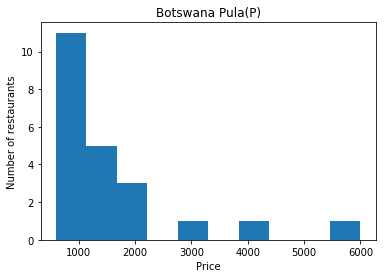

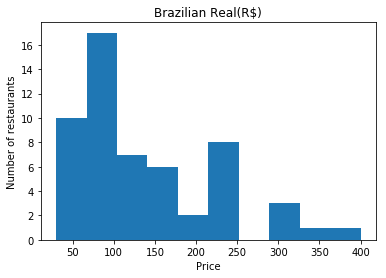

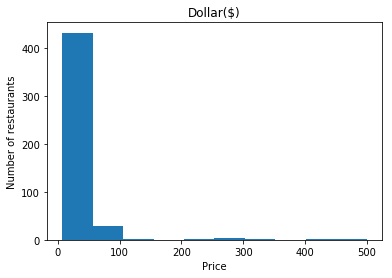

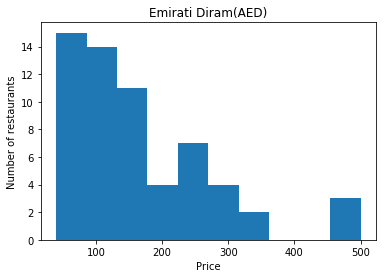

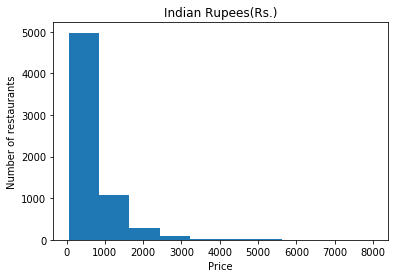

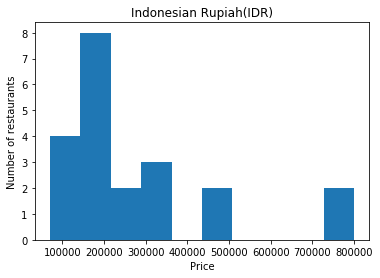

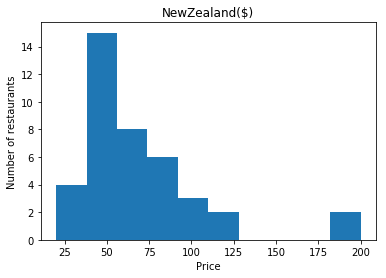

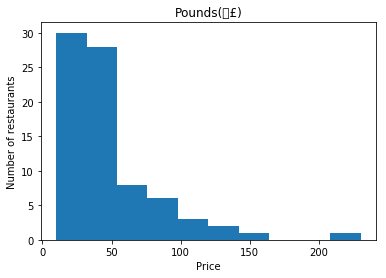

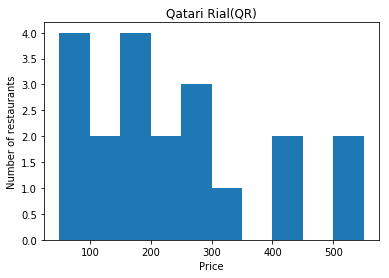

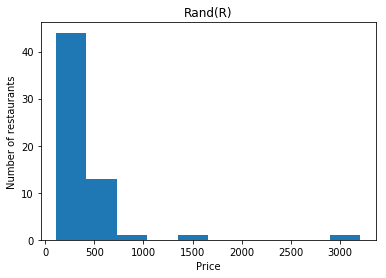

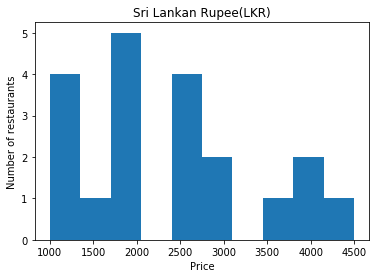

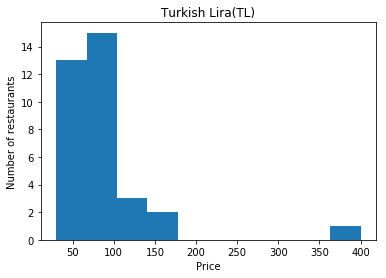

In [30]:
for currency, data in restaurants_with_cost_for_two.groupby('Currency', sort = False):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Average Cost for two"])
    plt.hist(data["Average Cost for two"])
    plt.title(currency)
    plt.xlabel("Price")
    plt.ylabel("Number of restaurants")
    plt.show()

We observe relatively similar trends between the price and the number of restaurants of the respective currency - more restaurants are cheaper. 

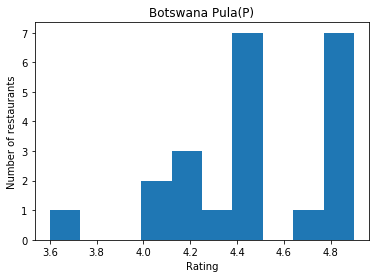

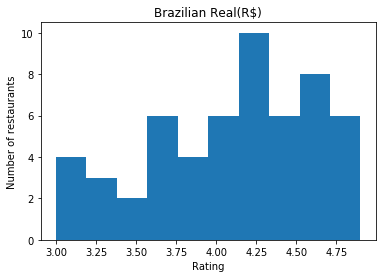

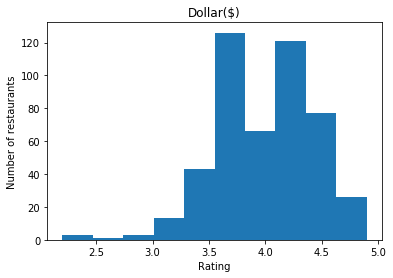

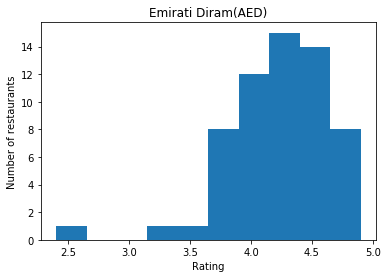

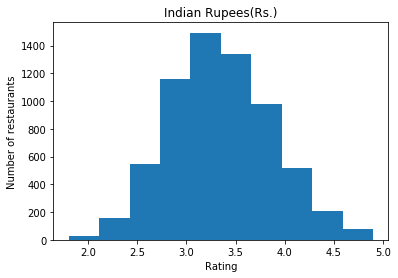

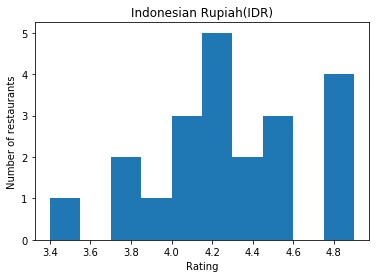

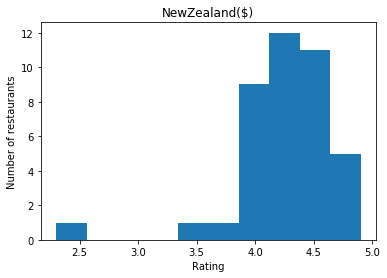

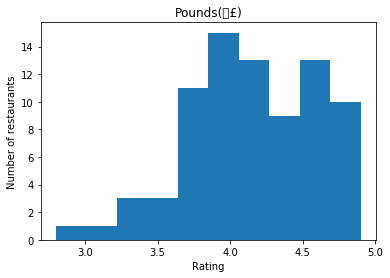

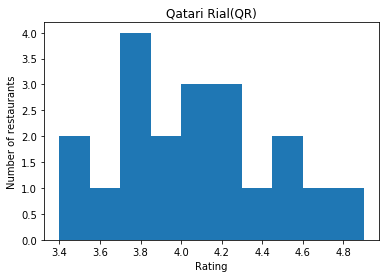

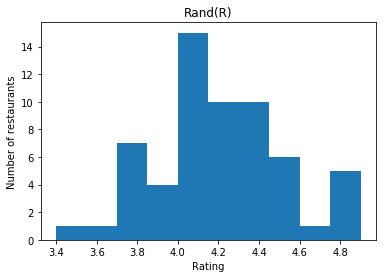

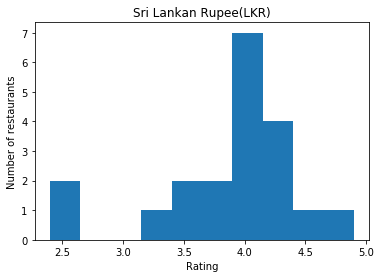

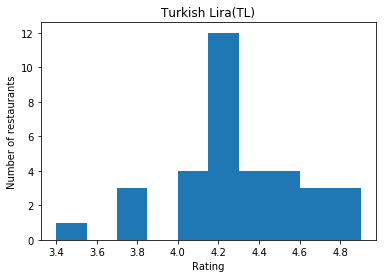

In [31]:
for currency, data in restaurants_with_rating.groupby('Currency', sort = False):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Aggregate rating"])
    plt.hist(data["Aggregate rating"])
    plt.title(currency)
    plt.xlabel("Rating")
    plt.ylabel("Number of restaurants")
    plt.show()

The rating trend for the same restaurants is almost the same. In most currencies we notice that most of the restaurants are with a rating higher than the average.

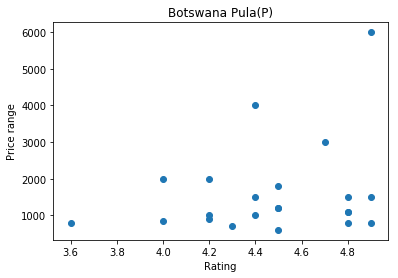

0.24874172258085872


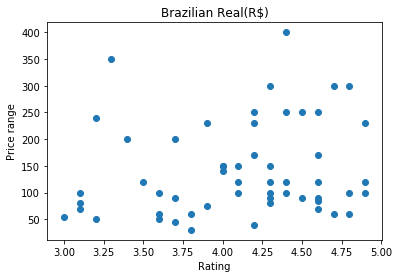

0.17835508168491906


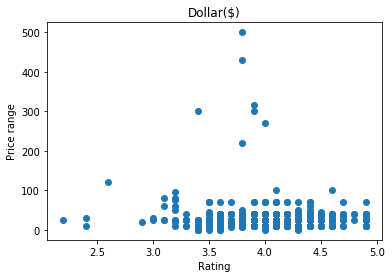

-0.05184350582866109


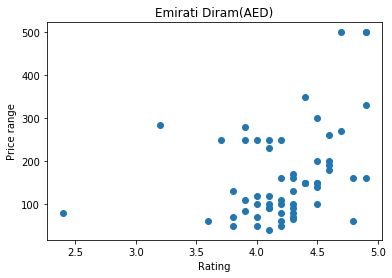

0.36552514518435214


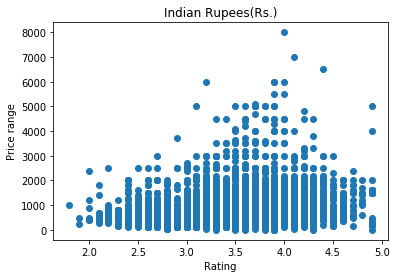

0.3101794829382209


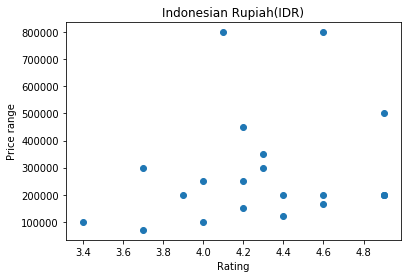

0.18788541655508448


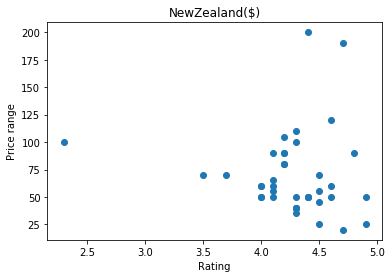

-0.07963921971018233


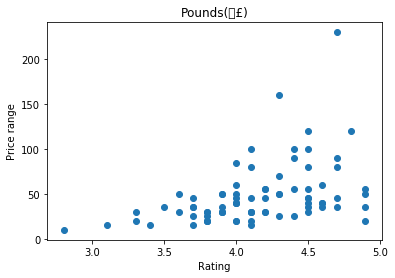

0.4272592855005063


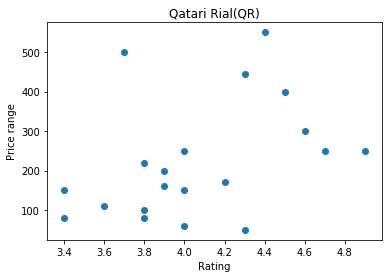

0.39621747925788076


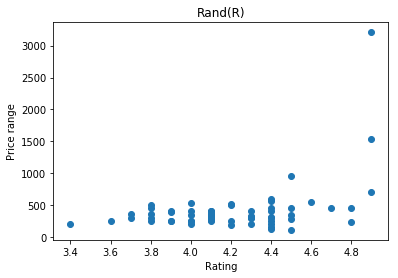

0.41748694765567873


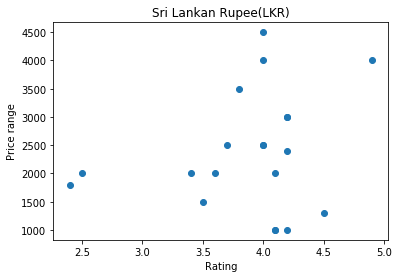

0.22597441388612255


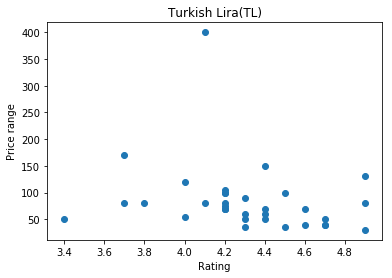

-0.21829376170533152


In [32]:
for currency, data in restaurants_with_rating.groupby('Currency', sort = False):
    plt.title(currency)
    plt.scatter(data["Aggregate rating"], data["Average Cost for two"])
    plt.xlabel("Rating")
    plt.ylabel("Price range")
    plt.show()
    print(data["Aggregate rating"].corr(data["Average Cost for two"]))

We observe that in the most currencies there is an upward trend, higher price - higher rating, but these dependencies are not very strongly expressed. In other currencies we notice downward trend, but it is about 0 and we will not take it into account.

To make restaurants ratings more objective we can take those for which more than 30 people are voted. But since for some currencies there are a big amount of restaurants, there will be a small number for comparison, which will lead to changes and inaccurate results.

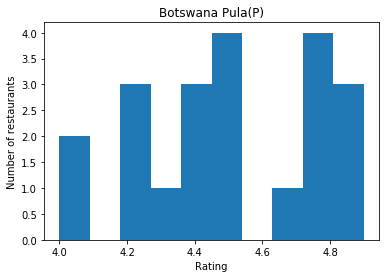

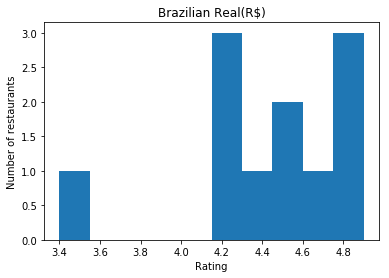

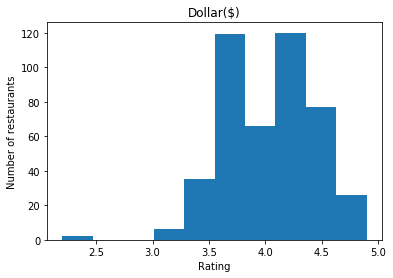

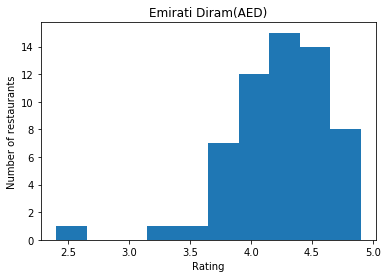

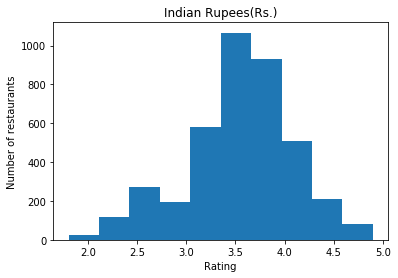

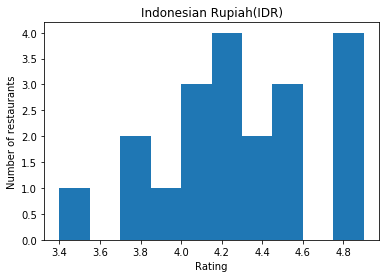

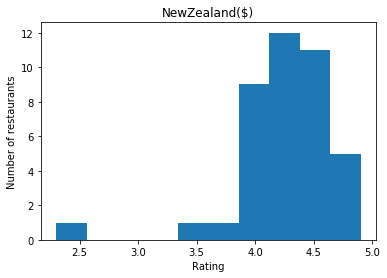

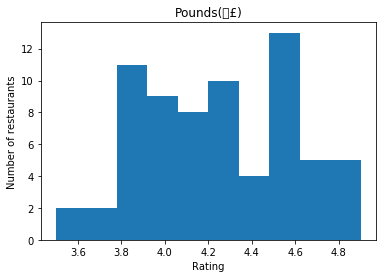

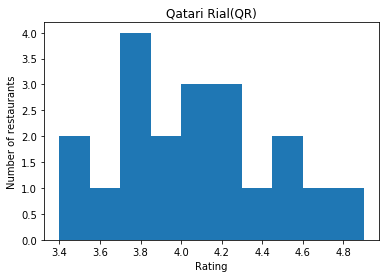

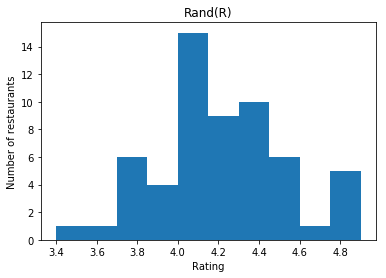

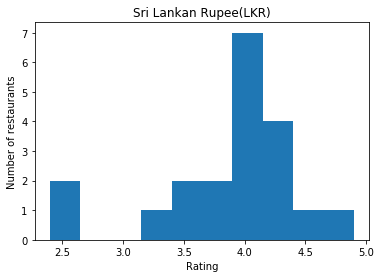

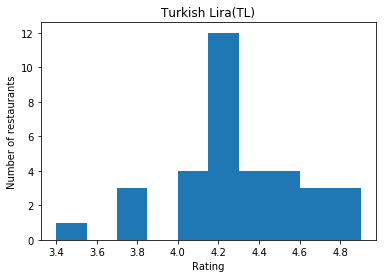

In [33]:
restaurants_with_30 = restaurants_with_rating[restaurants_with_rating["Votes"] > 30]
for currency, data in restaurants_with_30.groupby('Currency'):
    #plt.hist(data[data["Average Cost for two"] < 3000]["Aggregate rating"])
    plt.hist(data["Aggregate rating"])
    plt.title(currency)
    plt.xlabel("Rating")
    plt.ylabel("Number of restaurants")
    plt.show()

We will plot the rating average values against the currencies, also for the same values against cities in which the restaurants are located.

In [34]:
mean_rating_by_currency = restaurants_with_rating.groupby('Currency', sort = False)["Aggregate rating"].mean()
mean_rating_by_currency

Currency
Botswana Pula(P)          4.468182
Brazilian Real(R$)        4.105455
Dollar($)                 3.990605
Emirati Diram(AED)        4.233333
Indian Rupees(Rs.)        3.352034
Indonesian Rupiah(IDR)    4.295238
NewZealand($)             4.262500
Pounds(£)                4.139241
Qatari Rial(QR)           4.060000
Rand(R)                   4.210000
Sri Lankan Rupee(LKR)     3.870000
Turkish Lira(TL)          4.300000
Name: Aggregate rating, dtype: float64

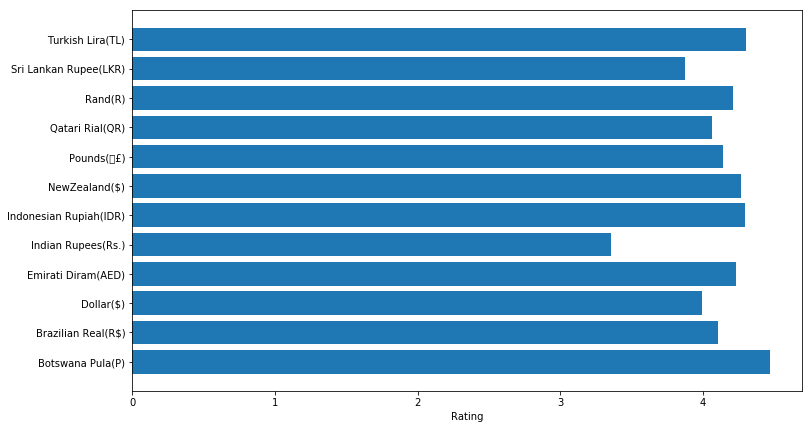

In [35]:
plt.figure(figsize = (12, 7))
plt.barh(mean_rating_by_currency.index, mean_rating_by_currency)
plt.xlabel("Rating")
plt.show()

In [36]:
mean_rating_by_city = restaurants_with_rating.groupby('City', sort = False)["Aggregate rating"].mean()
sorted_mean_rating_by_city = mean_rating_by_city.sort_values(ascending = False)
sorted_mean_rating_by_city

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Lincoln             4.500000
Secunderabad        4.500000
Tagaytay City       4.500000
Rio de Janeiro      4.489474
Orlando             4.475000
Rest of Hawaii      4.410000
Tampa Bay           4.410000
Palm Cove           4.400000
Tanunda             4.400000
Bangalore           4.375000
Dubai               4.370000
Pasay City          4.366667
Jakarta             4.356250
Hyderabad           4.344444
Chennai             4.315000
Ankara              4.305000
Tangerang           4.300000
Clatskanie          4.300000
Mohali              4.300000
Vernonia            4.300000
Abu Dhabi           4.300000
Vineland Station    4.300000
                      ...   
Lorn                3.600000
Singapore           3.575000
Albany              3.555000
Dubuque  

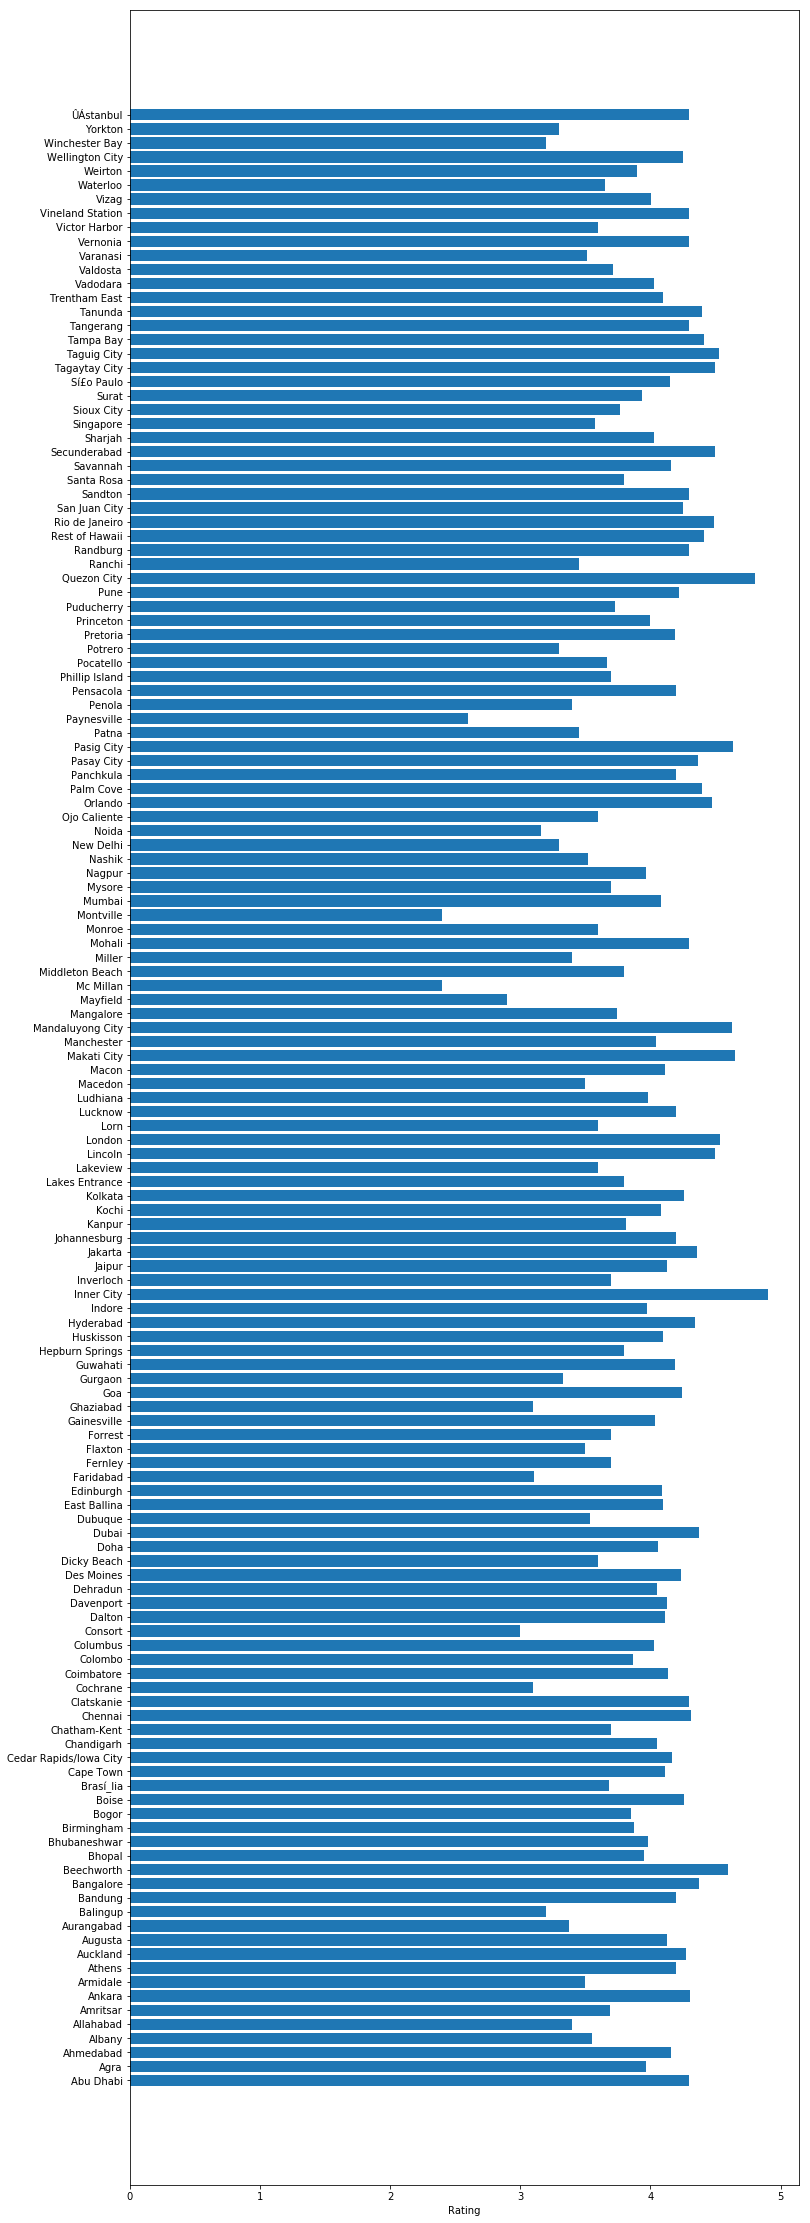

In [37]:
plt.figure(figsize = (12, 40))
plt.barh(sorted_mean_rating_by_city.index, sorted_mean_rating_by_city)
plt.xlabel("Rating")
plt.show()

We see that the average score of the cities is quite different. But this may be due to insufficient number of observations. For that reason we will get those restaurants for which more than 30 people are voted and we will group them by cities.

In [38]:
mean_rating_by_city_30 = restaurants_with_30.groupby('City', sort = False)["Aggregate rating"].mean()
sorted_mean_rating_by_city_30 = mean_rating_by_city_30.sort_values(ascending = False)
sorted_mean_rating_by_city_30

City
Inner City          4.900000
Rio de Janeiro      4.833333
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Lincoln             4.500000
Orlando             4.475000
Rest of Hawaii      4.410000
Tampa Bay           4.410000
Tanunda             4.400000
Palm Cove           4.400000
Bangalore           4.375000
Dubai               4.370000
Pasay City          4.366667
Jakarta             4.356250
Hyderabad           4.344444
Sí£o Paulo          4.325000
Chennai             4.315000
Ankara              4.305000
Tangerang           4.300000
Mohali              4.300000
Clatskanie          4.300000
Vernonia            4.300000
Vineland Station    4.300000
                      ...   
Puducherry          3.730000
Mysore              3.715789
Valdosta            3.715000
Chatham-K

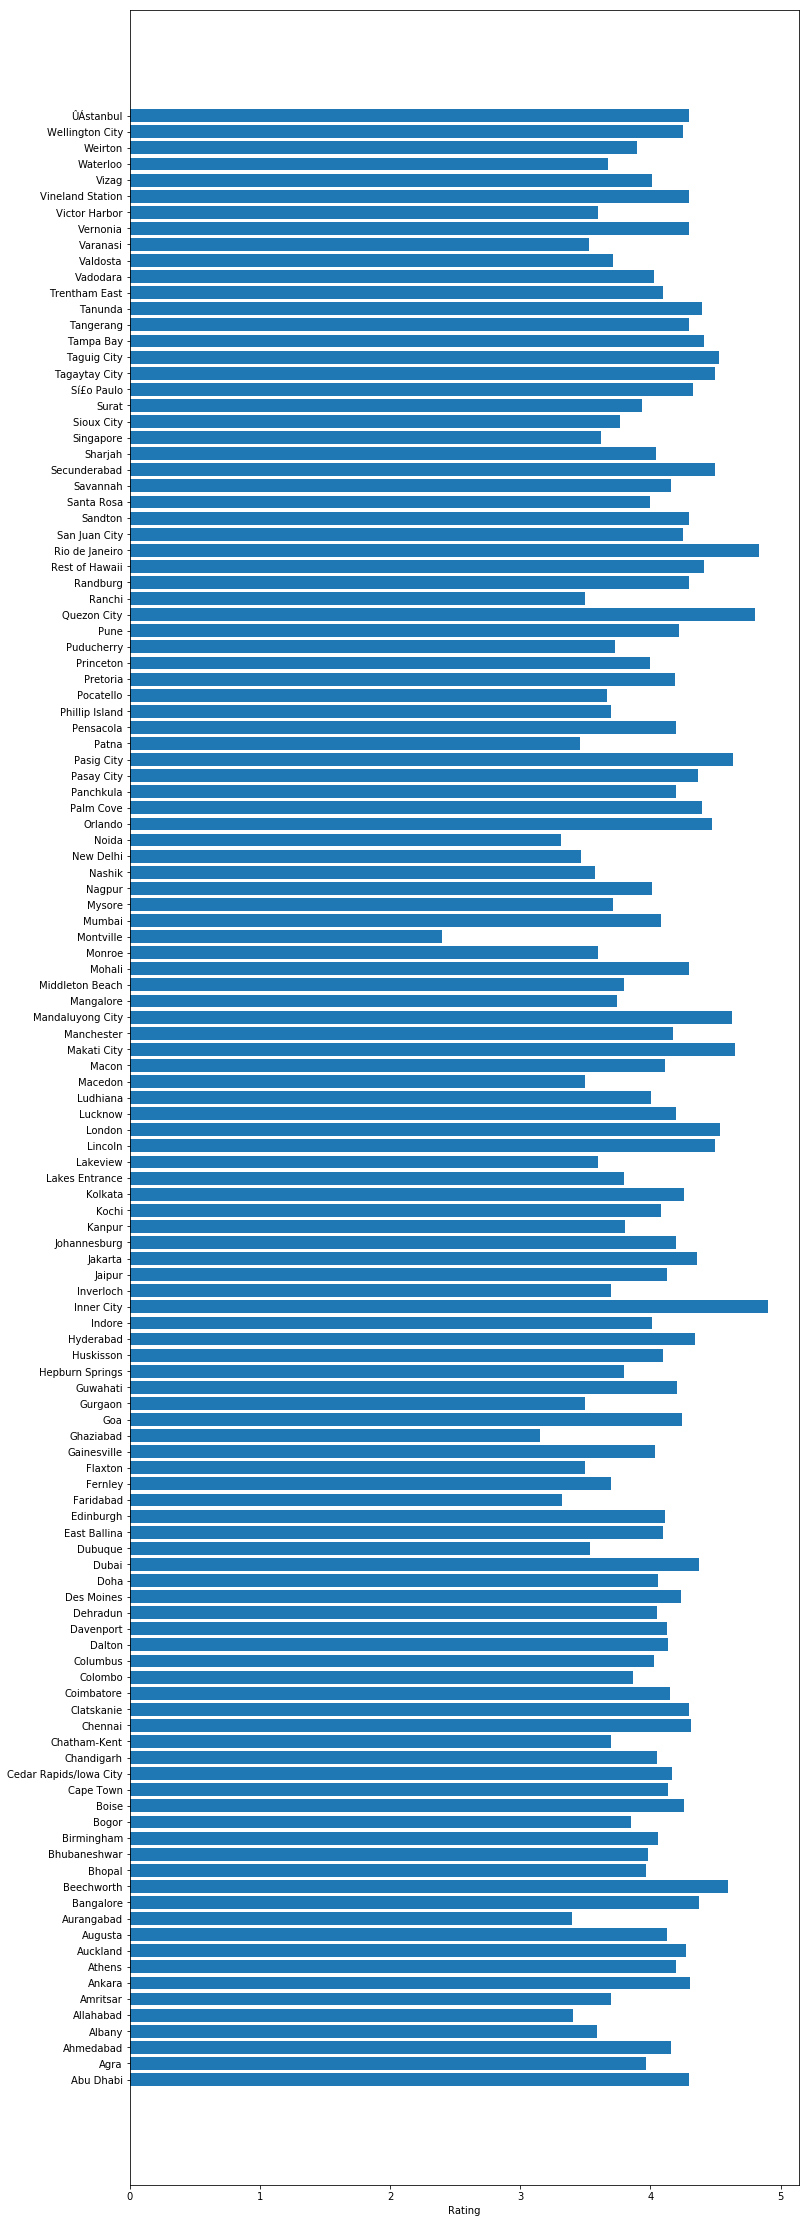

In [39]:
plt.figure(figsize = (12, 40))
plt.barh(sorted_mean_rating_by_city_30.index, sorted_mean_rating_by_city_30)
plt.xlabel("Rating")
plt.show()

We notice that even now there are big amplitudes at the averege ratings of the restaurants against cities in which they are located.

In the following rows we will pull out and rework the types of cuisines of the restaurants, so we can connect them with the next data set, which we will load.

In [40]:
restaurants_with_cuisine = restaurants_with_rating[restaurants_with_rating["Cuisines"].notna()]

In [41]:
list(restaurants_with_cuisine["Cuisines"].unique())

['French, Japanese, Desserts',
 'Japanese',
 'Seafood, Asian, Filipino, Indian',
 'Japanese, Sushi',
 'Japanese, Korean',
 'Chinese',
 'Asian, European',
 'Seafood, Filipino, Asian, European',
 'European, Asian, Indian',
 'Filipino',
 'Filipino, Mexican',
 'American, Ice Cream, Desserts',
 'Korean',
 'Cafe, American, Italian, Filipino',
 'Italian, Pizza',
 'Cafe, Korean, Desserts',
 'Cafe, Bakery, American, Italian',
 'Seafood, American, Mediterranean, Japanese',
 'American, Asian, Italian, Seafood',
 'Fast Food, French',
 'Cafe',
 'Bakery',
 'Brazilian',
 'Pizza',
 'Arabian',
 'Italian',
 'Bar Food, Brazilian',
 'Mexican, Grill',
 'International',
 'Peruvian, Latin American',
 'American, Grill',
 'Seafood',
 'American, Burger',
 'Seafood, Bar Food, Brazilian',
 'Desserts, Cafe',
 'Juices, Healthy Food',
 'Beverages, Bar Food, Fast Food',
 'Lebanese',
 'Burger',
 'Brazilian, Bar Food',
 'Brazilian, Healthy Food, Juices, Pizza',
 'Bakery, Sandwich, Brazilian',
 'Brazilian, Seafood',
 'S

### Second dataset - Cooking recipes

We load the second dataset, which is associated with cooking recipes. For each one is recorded the type of cuisine and the products necessary for its preparation.

In [42]:
data_recipes = pd.read_csv("srep00196-s3/srep00196-s3.csv", sep='\t', low_memory=False)
data_recipes.head()

,#
0,# Flavor network and the principles of food pa...
1,"# Yong-Yeol Ahn, Sebastian E. Ahnert, James P...."
2,#
3,"African,chicken,cinnamon,soy_sauce,onion,ginger"
4,"African,cane_molasses,ginger,cumin,garlic,tama..."


In [43]:
data_recipes = data_recipes.drop(data_recipes.index[[0,1,2]])
data_recipes = data_recipes.rename(columns = {"#" : "gg"})
data_recipes.head()

,gg
3,"African,chicken,cinnamon,soy_sauce,onion,ginger"
4,"African,cane_molasses,ginger,cumin,garlic,tama..."
5,"African,butter,pepper,onion,cardamom,cayenne,g..."
6,"African,olive_oil,pepper,wheat,beef,onion,card..."
7,"African,honey,wheat,yeast"


In [44]:
data_recipes['cuisine'] = data_recipes["gg"].str.extract('(\w+)', expand = True)
data_recipes['ingredients'] = data_recipes["gg"].str.extract('(,[a-z].{,})', expand = True)
data_recipes = data_recipes.drop("gg", axis=1)
data_recipes.head()

,cuisine,ingredients
3,African,",chicken,cinnamon,soy_sauce,onion,ginger"
4,African,",cane_molasses,ginger,cumin,garlic,tamarind,br..."
5,African,",butter,pepper,onion,cardamom,cayenne,ginger,c..."
6,African,",olive_oil,pepper,wheat,beef,onion,cardamom,cu..."
7,African,",honey,wheat,yeast"


In [45]:
print(data_recipes.shape)

(56498, 2)


In [46]:
data_recipes.groupby('cuisine', sort = False)["cuisine"].count()

cuisine
African               352
EastAsian            2512
EasternEuropean       381
LatinAmerican        2917
MiddleEastern         645
NorthAmerican       41524
NorthernEuropean      250
SouthAsian            621
SoutheastAsian        457
SouthernEuropean     4180
WesternEuropean      2659
Name: cuisine, dtype: int64

We replace the types of cuisines from Restaurants dataset with those from Recipes dataset so we can connect them logically.

In [47]:
list(data_recipes["cuisine"].unique())

['African',
 'EastAsian',
 'EasternEuropean',
 'LatinAmerican',
 'MiddleEastern',
 'NorthAmerican',
 'NorthernEuropean',
 'SouthAsian',
 'SoutheastAsian',
 'SouthernEuropean',
 'WesternEuropean']

In [48]:
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Japanese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Korean", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Chinese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sushi", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Filipino", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Indian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Arabian", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Lebanese", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mexican", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Brazilian", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Peruvian", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Latin American", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Italian", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pizza", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("French", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("American", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bar Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Grill", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Burger", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fast Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Steak", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("BBQ", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Desserts", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bubble Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Breakfast", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Diner", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Vegetarian", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Coffee and Tea", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bakery", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cafe", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Beverages", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Juices", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Healthy Food", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Juices", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Ice Cream", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Turkish", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Finger Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Hawaiian", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Soul Food", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Canadian", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cajun", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Gourmet NorthAmerican", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Singaporean", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Malay", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Vietnamese", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Thai", "SoutheastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Irish", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Australian", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern Australian", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("German", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("European", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Greek", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Spanish", "SouthernEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tex-Mex", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Caribbean", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tapas", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Teriyaki", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Goan", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Naga", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Andhra", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kashmiri", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kerala", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Gujarati", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bihari", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Rajasthani", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Biryani", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Hyderabadi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Nepalese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mithai", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Lucknowi", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("British", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Afghani", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Tibetan", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthernWesternEuropean", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("North SouthAsian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("LatinNorthAmerican", "LatinAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("South SouthAsian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WesternWesternEuropean", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Raw Meats", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Drinks Only", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Salad", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fusion", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("International", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Continental", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Coffee and Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bubble Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sandwich", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Street Food", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Seafood", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Oriya", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Awadhi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Burmese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Assamese", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bengali", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Chettinad", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Parsi", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Maharashtrian", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mughlai", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pakistani", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Iranian", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Middle Eastern", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cantonese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Dim Sum", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Belgian", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Portuguese", "SouthernEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Cuban", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("New NorthAmerican", "NorthAmerican")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Pub Food", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern WesternEuropean", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mediterranean", "SouthernEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("North Eastern", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Deli", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Modern SouthAsian", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("EastAsian", "EastAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SoutheastAsian", "SoutheastAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthAsian", "SouthAsia")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Asian", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("EastAsia", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SoutheastAsia", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("SouthAsia", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Ramen", "EastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Mangalorean", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Durban", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sri Lankan", "SouthAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Restaurant Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("World Cuisine", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Patisserie", "Other")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Bí_rek", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Dí_ner", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Izgara", "MiddleEastern")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kebab", "MiddleEastern")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Durban", "African")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("South African", "African")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Argentine", "LatinAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Indonesian", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Kiwi", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Curry", "SouthAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Taiwanese", "EastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Fish and Chips", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WesternEuropean", "WestEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Western", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("WestEuropean", "WesternEuropean")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Contemporary", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Scottish", "WesternEuropean")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Peranakan", "SoutheastAsian")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Sunda", "SoutheastAsian")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Other Other", "Other")
restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Charcoal NorthAmerican", "NorthAmerican")

restaurants_with_cuisine["Cuisines"] = restaurants_with_cuisine["Cuisines"].str.replace("Moroccan", "African")

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Martin28\Anaconda3\lib\site-packages\ipykernel_launcher.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [49]:
#african_restaurants = restaurants_with_cuisine[restaurants_with_cuisine["Cuisines"].str.contains("African")]

### Third dataset - Food nutrition of products

We proceed our research by loading and reading the data set, containing information about best restaurants of the major cities in the world.

In [50]:
data_nutrition = pd.read_csv("en.openfoodfacts.org.products.tsv", sep='\t', low_memory=False)
data_nutrition.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We print the shape of the set to know what is the amount of data we are going to work with.

In [51]:
print(data_nutrition.shape)

(356027, 163)


We list column names of the set to get an idea what data we are working with.

In [52]:
list(data_nutrition)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

We check the number of the unique elements in the "code" column to decide whether to make it an index on our table.

In [53]:
len(data_nutrition["code"].unique())

356002

We sее that the number of data in the "code" column is less than the total, which means that there are repeatable codes and for that reason we woudn't do "code" column as an index.

We begin with the processing of the first set of our research by dropping the columns that will not be needed for the purpose of our research. As well as on columns that have NAN values.

In [54]:
drop_columns_list = ["url", "creator", "created_t", "created_datetime", "last_modified_t", "last_modified_datetime",
                     "packaging", "packaging_tags", "brands", "brands_tags", "categories", "categories_tags",
                     "categories_en", "origins", "origins_tags", "manufacturing_places", "manufacturing_places_tags", 
                     "labels", "labels_tags", "labels_en", "emb_codes", "emb_codes_tags", "first_packaging_code_geo", 
                     "cities", "cities_tags", "purchase_places", "stores", "countries", "countries_tags", 
                     "ingredients_text", "allergens", "allergens_en", "traces", "traces_tags", "quantity", "countries_en", 
                     "traces_en", "serving_size", "no_nutriments", "additives_n", "additives", "additives_tags", "additives_en", 
                     "ingredients_from_palm_oil", "ingredients_from_palm_oil_n", "ingredients_from_palm_oil_tags", 
                     "ingredients_that_may_be_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil", 
                     "ingredients_that_may_be_from_palm_oil_tags", "nutrition_grade_uk", "states", "states_tags", 
                     "states_en", "main_category", "image_url", "image_small_url"]

In [55]:
data_nutrition = data_nutrition.drop(drop_columns_list, axis=1)

In [56]:
drop_null_columns = data_nutrition.columns[data_nutrition.isna().all()].tolist()
data_nutrition = data_nutrition.drop(drop_null_columns, axis=1)

In [57]:
print(data_nutrition.shape)

(356027, 95)


We check whether columns "product_name" and "generic_name" are of the same length to consider whether we can leave only one column of these two.

In [58]:
len(data_nutrition["product_name"])

356027

In [59]:
len(list(data_nutrition["generic_name"].unique()))

42452

In [60]:
data_nutrition["product_name"].isnull().sum()

17512

In [61]:
data_nutrition["product_name"].notnull().sum()

338515

We take the observations which have a product name.

In [62]:
data_nutrition = data_nutrition[data_nutrition["product_name"].notnull()]

List the unique category names.

In [63]:
list(data_nutrition["pnns_groups_2"].unique())

[nan,
 'unknown',
 'Vegetables',
 'Biscuits and cakes',
 'Bread',
 'Legumes',
 'Sweetened beverages',
 'Pizza pies and quiche',
 'Meat',
 'Sweets',
 'Non-sugared beverages',
 'Alcoholic beverages',
 'Dressings and sauces',
 'Ice cream',
 'Cheese',
 'One-dish meals',
 'vegetables',
 'Appetizers',
 'Chocolate products',
 'Soups',
 'Fruits',
 'Cereals',
 'Milk and yogurt',
 'Fats',
 'Sandwich',
 'Artificially sweetened beverages',
 'Fruit juices',
 'Nuts',
 'Breakfast cereals',
 'Eggs',
 'Fish and seafood',
 'Dried fruits',
 'Processed meat',
 'Potatoes',
 'pastries',
 'Dairy desserts',
 'Fruit nectars',
 'Tripe dishes',
 'fruits',
 'Salty and fatty products',
 'cereals',
 'legumes',
 'nuts']

Take observations which have a category in "pnns_groups_2" column.

In [64]:
data_nutrition_with_categories = data_nutrition[data_nutrition["pnns_groups_2"].notnull() == True]

In [65]:
len(data_nutrition_with_categories)

129437

Drop observations which have category that we wouldn't need.

In [66]:
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Biscuits and cakes"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Bread"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sweetened beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Pizza pies and quiche"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sweets"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Non-sugared beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Dressings and sauces"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Ice cream"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "One-dish meals"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Appetizers"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Chocolate products"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Soups"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Sandwich"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Artificially sweetened beverages"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Fruit juices"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Breakfast cereals"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "pastries"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Dairy desserts"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Fruit nectars"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Tripe dishes"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "Salty and fatty products"].index)
data_nutrition_with_categories = data_nutrition_with_categories.drop(data_nutrition_with_categories[data_nutrition_with_categories["pnns_groups_2"] == "cereals"].index)

In new table we take only observations which have any recorded value in "fat_100g" column. We make this table to do our computations with it.

In [67]:
data_with_fat_100g = data_nutrition_with_categories[data_nutrition_with_categories["fat_100g"].notnull()]
len(data_with_fat_100g)

59898

We put the product names in a list.

In [68]:
product_names_list = data_nutrition_with_categories["product_name"].tolist()

### Future work: Combining the three sets

For our future work we will try to combine the three sets to understand whether there is a dependence between food nutritions and people's ratings.
We will also deepen our analysis of the factors we have already examined.

For each cuisine we get all the products.

In [69]:
cuisine_list, ingredients_list = [], []
for cuisine, data in data_recipes.groupby('cuisine', sort = False):
    cuisine_list.append(cuisine)
    ingredients_list.append(data.ingredients)

We will use Counter to count which are the most used 20 ingredients in every cuisine.

In [70]:
top_20_ingredients = []
for set_of_ingredients in ingredients_list:
    ingredients_string = ''.join(set_of_ingredients)
    text_words = re.split("\W+", ingredients_string)
    word_counter = Counter(text_words)
    top_20_ingredients.append(word_counter.most_common(20))

We take the mean value of fat contained in 100g of product for each ingredient.

In [71]:
def get_mean_per_ingredient(ingredient_arg):
    E_list = []
    for element in product_names_list:
        founded = re.findall(ingredient_arg, element)
        if founded:
            E_list.append(data_with_fat_100g.loc[data_with_fat_100g["product_name"] == element]["fat_100g"])
            #E_list.append(data_with_fat_100g[data_with_fat_100g["product_name"] == element]["fat_100g"])
        else:
            E_list.append(1)
    print(list(E_list))
    pu = (sum(E_list)+1) / (len(E_list)+1)
    return pu

#get_mean_per_ingredient("tomato")

In [ ]:
cuisine_mean_list = []
E_mean = 0.0
for set_big in top_20_ingredients:
    for ingredient in set_big:
        for m in ingredient:
            if isinstance(m, int):
                break
            else:
                E_mean = get_mean_per_ingredient(m)
                if E_mean:
                    cuisine_mean_list.append(E_mean)

#print(cuisine_mean_list)

### Conclusion

From our research we can conclude that the people's rating of the best restaurants of the major cities in the world are influenced by multiple conditions. From the previous research we undertand that the users' ratings are largely dependent on social networks, on awards won by the restaurant and on the management of the restaurant. We have proven that the results are also affected by the price category, the city where the restaurant is located. We have ploted our results with various gaphical visualizations. In our future work we will try to combine the three datasets to understand whether there is a dependence between food nutritions and people's ratings.

### References

[1] https://www.modernrestaurantmanagement.com/the-impact-of-reviews-on-the-restaurant-market-infographic/

[2] https://www.bighospitality.co.uk/Article/2014/02/12/TripAdvisor-study-gives-insight-into-impact-of-reviews

[3] Woo Gon Kim, Jun (Justin) Li, Robert A. Brymer, 2016, The impact of social media reviews on restaurant performance: The moderating role of excellence certificate